In [ ]:
#Reading in libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, confusion_matrix, ConfusionMatrixDisplay
#from sklearn.model_selection import train_test_split
#from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
#from sklearn.pipeline import make_pipeline
#from sklearn.model_selection import GridSearchCV
#from sklearn.decomposition import PCA

#from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
#from sklearn import tree
#import matplotlib.pyplot as plt
#import math
#from skopt import BayesSearchCV

import tensorflow as tf
from tensorflow import keras
#import keras_tuner
from tensorflow.keras import layers
from keras.models import Sequential
from keras.models import Model
from tensorflow.keras import initializers

from keras.utils.np_utils import to_categorical
from keras.regularizers import l1, l2
#from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import sequence

import seaborn as sns

from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

from joblib import dump, load
import joblib

import warnings

#import sys

# Reading in Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving features.csv to features.csv


In [ ]:
AudioData = pd.read_csv('features.csv')
AudioData.head(10)

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,Emotion
0,0.038891,0.470762,0.580041,0.556164,0.485299,0.460506,0.484227,0.506228,0.460546,0.536092,...,6.204343e-07,1.810680e-07,30.325378,19.403687,21.866991,19.155308,22.740866,19.702703,50.953309,Disgust
1,0.074024,0.564610,0.669950,0.660861,0.596096,0.573729,0.565783,0.569342,0.542778,0.600784,...,2.699842e-02,2.621805e-02,24.214328,18.093431,19.081227,14.339408,15.280328,13.821124,13.617951,Disgust
2,0.036010,0.337834,0.433951,0.576598,0.553174,0.446085,0.431478,0.449681,0.458042,0.448164,...,3.287237e-07,6.452242e-08,33.409295,19.594216,22.811201,20.137145,22.575847,20.587578,52.658367,Disgust
3,0.033904,0.662605,0.704369,0.623005,0.550529,0.483566,0.450042,0.422957,0.463125,0.555203,...,3.427215e-05,8.903367e-06,30.483110,19.709231,20.306943,18.802990,21.573450,19.994558,50.950351,Disgust
4,0.033868,0.671452,0.723635,0.643924,0.571611,0.498932,0.456688,0.431968,0.472708,0.568428,...,7.383929e-05,4.553373e-05,30.263579,19.300359,20.366364,18.683943,20.774781,16.853630,15.156141,Disgust
5,0.040469,0.563049,0.704122,0.741899,0.642924,0.571590,0.481145,0.444777,0.412684,0.437085,...,1.821190e-05,3.769441e-06,33.857414,19.335322,20.615470,19.371393,21.827227,21.043356,52.027111,Disgust
6,0.034050,0.499493,0.402782,0.447793,0.501329,0.508590,0.535210,0.544416,0.581536,0.531757,...,1.710315e-06,2.970754e-07,30.814880,19.242934,20.753847,18.205382,18.287174,18.151676,49.278799,Disgust
7,0.034538,0.500710,0.490847,0.569935,0.615811,0.624793,0.628846,0.593419,0.622426,0.573399,...,2.765613e-04,2.666047e-04,29.796519,18.047761,19.932631,16.866437,17.129580,14.747024,14.806323,Disgust
8,0.036499,0.560245,0.433140,0.386937,0.454244,0.539771,0.567325,0.590524,0.593385,0.635575,...,5.399469e-07,9.045515e-08,32.716027,19.868795,22.158762,19.493096,20.126953,20.446834,49.239741,Disgust
9,0.046594,0.555459,0.539101,0.544937,0.591256,0.627941,0.670136,0.564776,0.471759,0.531354,...,7.056893e-06,2.328165e-06,28.746856,17.487574,20.140419,17.893547,21.686273,18.704486,50.437594,Disgust


In [ ]:
np.unique(AudioData['Emotion'])

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise',
       'Surprising'], dtype=object)

## RNN

Checking Keras and Python version to determine if the tuner can be used. Requirements: Python 3.6+ and TensorFlow 2.0+

In [ ]:
keras.__version__
sys.version

As per lecture material - data split will be updated to 60% testing, 20% training, and 20% validation. 

Due to the high variance in the dataset, instead, the data will be split into 80-10-10. This allows more training data to be fed into the model.

In [ ]:
trainingdataNN = AudioData.groupby('Emotion', group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state = 8))

X_trNN = trainingdataNN.drop(['Emotion'],axis=1)
Y_trNN = trainingdataNN['Emotion']
display(trainingdataNN)

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,Emotion
3985,0.209022,0.615930,0.629533,0.537422,0.539763,0.646221,0.564628,0.492218,0.528131,0.540121,...,4.459659e-03,4.467287e-03,12.264729,19.750778,20.293469,17.807346,16.729766,17.472308,13.668810,Angry
17465,0.069415,0.602191,0.458399,0.461018,0.415263,0.593954,0.664165,0.540903,0.526180,0.540711,...,1.146035e-06,4.474630e-07,15.999148,18.047755,21.464543,21.493378,20.090109,22.086128,64.949354,Angry
28176,0.068537,0.588538,0.651782,0.640202,0.603821,0.551318,0.615094,0.654251,0.736365,0.726728,...,4.204036e-06,4.162336e-06,18.538895,15.891366,19.443295,14.670579,18.829608,20.033528,63.984221,Angry
22233,0.053627,0.583351,0.653151,0.656826,0.638719,0.621396,0.669126,0.599697,0.578763,0.633889,...,1.732381e-06,1.717884e-06,13.501847,14.589915,17.284163,18.868818,20.905453,19.297238,61.996385,Angry
29358,0.100923,0.562470,0.533881,0.507609,0.527478,0.600896,0.614688,0.655558,0.620358,0.643287,...,1.948537e-06,1.925934e-06,14.485351,16.040351,16.460947,17.908396,18.975610,18.980028,64.477006,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0.027555,0.620602,0.611620,0.622188,0.652557,0.587676,0.550081,0.526583,0.547161,0.597673,...,6.226604e-04,6.206081e-04,30.444714,16.897466,19.021750,15.484793,17.081293,14.845213,14.500237,Surprising
626,0.037558,0.568094,0.524892,0.385427,0.319149,0.336000,0.426416,0.542300,0.544863,0.515762,...,7.018638e-08,1.248153e-08,32.942853,20.636904,22.298685,21.102678,20.503427,20.299775,59.133929,Surprising
603,0.070421,0.606136,0.579121,0.527542,0.423288,0.428320,0.453846,0.463117,0.425449,0.484910,...,1.285681e-06,8.609435e-07,27.962814,18.215190,19.701425,20.570814,18.143109,18.870005,57.555808,Surprising
901,0.095274,0.544987,0.542799,0.557157,0.542854,0.528467,0.496271,0.433527,0.445179,0.482204,...,2.113032e-03,2.019561e-03,25.839607,18.800310,20.008626,17.076948,16.662271,16.830862,14.796245,Surprising


In [ ]:
TestVal = AudioData[~AudioData.index.isin(trainingdataNN.index)]
testingdataNN = TestVal.groupby('Emotion', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state = 8))
valdataNN = TestVal[~TestVal.index.isin(testingdataNN.index)]

X_teNN = testingdataNN.drop(['Emotion'],axis=1)
Y_teNN = testingdataNN['Emotion']

X_valNN = valdataNN.drop(['Emotion'],axis=1)
Y_valNN = valdataNN['Emotion']

In [ ]:
display(X_teNN)

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
16953,0.053900,0.588831,0.596698,0.529117,0.538768,0.641880,0.654099,0.725864,0.618889,0.615994,...,7.588385e-06,7.496659e-06,7.439717e-06,15.276055,15.393027,16.950271,18.119597,17.502405,17.197361,63.233099
31118,0.140958,0.674408,0.645613,0.621940,0.602149,0.589005,0.508954,0.518937,0.597902,0.642033,...,1.231558e-04,3.334791e-05,2.855021e-06,22.159346,17.886426,22.139420,19.390207,19.920732,22.018232,50.697274
4136,0.200039,0.669320,0.534526,0.528261,0.464555,0.346594,0.329524,0.457425,0.445445,0.442891,...,2.487865e-03,1.803925e-03,1.259302e-04,20.372215,20.029145,22.265654,20.944219,22.585991,23.175508,51.005349
21382,0.207611,0.641933,0.607900,0.620715,0.674392,0.658862,0.622954,0.568593,0.595905,0.557012,...,1.308373e-02,1.351006e-02,1.366414e-02,11.992381,15.964872,17.687555,15.710683,14.577986,13.911348,13.639906
1755,0.072180,0.632452,0.589594,0.417647,0.401400,0.376450,0.345953,0.434198,0.522286,0.481242,...,4.074976e-05,2.279345e-05,2.002413e-06,23.495339,20.769010,24.013420,23.188309,22.892827,18.492977,45.041485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.038732,0.571092,0.606256,0.536806,0.462412,0.454300,0.553975,0.575210,0.601603,0.565401,...,1.291397e-08,8.214259e-09,1.570213e-09,27.991942,15.738137,19.768009,19.735930,20.242813,20.363803,48.040793
1223,0.030859,0.562794,0.489666,0.480386,0.536043,0.483916,0.523068,0.522732,0.526267,0.557006,...,1.992869e-09,9.981770e-10,1.003269e-10,30.359259,17.098860,19.575940,20.824147,20.561347,22.332985,49.773345
1240,0.217854,0.712459,0.709250,0.705634,0.711931,0.713874,0.721854,0.672270,0.664393,0.666444,...,2.961709e-04,3.042304e-04,3.324691e-04,20.875578,14.744852,16.336007,14.663711,13.291318,13.498762,13.409688
593,0.032262,0.490456,0.475262,0.477518,0.492470,0.530871,0.569853,0.627045,0.655295,0.700390,...,2.950105e-08,1.646953e-08,1.838378e-09,27.786871,15.640828,17.710909,19.308112,21.001096,18.371720,51.952687


In [ ]:
display(X_valNN)

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
13,0.220975,0.616789,0.618518,0.663071,0.679455,0.702730,0.641532,0.545158,0.532574,0.619460,...,0.068078,0.070176,6.870682e-02,20.950055,16.741848,19.818415,15.306642,15.544656,13.409330,13.562461
17,0.036542,0.475608,0.565633,0.561396,0.549132,0.552064,0.588044,0.647026,0.632294,0.461842,...,0.000003,0.000002,3.811731e-07,32.281563,18.992116,21.106172,19.587295,21.567115,20.337062,54.223106
25,0.113525,0.578972,0.620618,0.668756,0.694648,0.616924,0.568921,0.522068,0.495153,0.468491,...,0.012214,0.011749,1.157748e-02,23.618486,17.249304,19.686181,15.615449,16.309500,13.499425,13.376966
28,0.176505,0.553408,0.619100,0.641671,0.607506,0.604142,0.620096,0.629670,0.560522,0.556620,...,0.051261,0.051220,5.173044e-02,21.289769,18.336902,18.630364,14.445908,14.962407,13.533671,13.576823
58,0.087678,0.648332,0.437435,0.397505,0.393379,0.408274,0.432546,0.438718,0.395679,0.381121,...,0.052437,0.054365,5.435863e-02,24.347521,20.072363,22.404784,16.116327,15.542586,13.561118,13.521466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33869,0.206995,0.615107,0.565086,0.546249,0.606146,0.598008,0.517979,0.576818,0.605899,0.668630,...,0.000069,0.000045,7.667932e-06,23.950033,17.866463,19.465928,19.242724,21.608808,23.096265,47.303042
33877,0.241618,0.573325,0.572063,0.610565,0.617225,0.574593,0.492307,0.448980,0.449045,0.507886,...,0.002869,0.002302,2.546831e-04,11.386844,19.989124,21.436037,18.763191,18.719489,17.142278,15.732208
33880,0.246826,0.721360,0.673401,0.597299,0.517307,0.479596,0.435075,0.480149,0.514665,0.545389,...,0.002830,0.001695,2.691437e-04,9.996083,19.436807,21.297982,18.321674,18.159448,17.087898,15.302359
33881,0.191714,0.561032,0.714673,0.654064,0.518269,0.387520,0.352157,0.333408,0.405707,0.456508,...,0.000550,0.000446,1.951150e-05,16.968951,22.541263,24.834023,21.960768,22.386276,21.821803,50.306544


In [ ]:
encoder = OneHotEncoder()
Y_trHE = encoder.fit_transform(np.array(Y_trNN).reshape(-1,1)).toarray()
Y_valHE = encoder.transform(np.array(Y_valNN).reshape(-1,1)).toarray() #updated so only fitting training then using that for validation

In [ ]:
#For reuploading the Encoder
enc = joblib.load('RNNencoder.joblib')

Y_trHE = enc.transform(np.array(Y_trNN).reshape(-1,1)).toarray()
Y_valHE = enc.transform(np.array(Y_valNN).reshape(-1,1)).toarray()

#Reference: https://stackoverflow.com/questions/59511198/save-and-load-one-hot-encoding-for-ml

In [ ]:
#Using uploaded encoder - checking for shape
print(Y_valHE.shape)
print(Y_trHE.shape)

(3391, 8)
(27124, 8)


In [ ]:
#Checking if the encoding was successful
Y_valHE

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
print(Y_valHE.shape)
print(Y_trHE.shape)

(3391, 8)
(27124, 8)


In [ ]:
scaler = StandardScaler()

X_trNN_transformed = scaler.fit_transform(X_trNN)
X_teNN_transformed = scaler.transform(X_teNN) #Updated again under similar logic to above for OneHotEncoder
X_valNN_transformed = scaler.transform(X_valNN) #Updated again under similar logic to above for OneHotEncoder

In [ ]:
X_trHE = np.expand_dims(X_trNN_transformed, axis=2)
X_valHE = np.expand_dims(X_valNN_transformed, axis=2)
print(X_trHE.shape)
print(X_valHE.shape)

(27124, 169, 1)
(3391, 169, 1)


In [ ]:
model = keras.Sequential()

model.add(layers.Bidirectional(layers.LSTM(units =250, activation='sigmoid',return_sequences=True, dropout = 0.05,kernel_initializer=initializers.RandomNormal(stddev=0.2)), 
                               input_shape=(X_trNN_transformed.shape[1],1)))

model.add(layers.Bidirectional(layers.LSTM(units = 180,activation='sigmoid',return_sequences=True, dropout = 0.14,kernel_initializer=initializers.RandomNormal(stddev=0.2))))

model.add(layers.Bidirectional(layers.LSTM(units = 50, activation='sigmoid',return_sequences=True, dropout = 0.1,kernel_initializer=initializers.RandomNormal(stddev=0.2))))

model.add(layers.Bidirectional(layers.LSTM(units = 110,activation='sigmoid',dropout = 0.14,kernel_initializer=initializers.RandomNormal(stddev=0.2))))

model.add(tf.keras.layers.Dense(8,activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy']) 

In [ ]:
model.save("RNN_model.h5", save_format='h5')

In [ ]:
files.download("RNN_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
joblib.dump(encoder, 'RNNencoder.joblib')

['RNNencoder.joblib']

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 169, 500)         504000    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 169, 360)         980640    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 169, 100)         164400    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 220)              185680    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 8)                 1

In [ ]:
filepath = "model.tf"
checkpoint = ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min', save_format='tf')
callbacks_list = [checkpoint]

history = model.fit(X_trHE, Y_trHE, validation_data=(X_valHE, Y_valHE), batch_size=250, epochs=7, callbacks=callbacks_list)

#Reference: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

Epoch 1/7
109/109 [==============================] - ETA: 0s - loss: 1.8746 - accuracy: 0.1907 

109/109 [==============================] - 1610s 15s/step - loss: 1.8746 - accuracy: 0.1907 - val_loss: 1.8569 - val_accuracy: 0.1929
Epoch 2/7
109/109 [==============================] - ETA: 0s - loss: 1.7697 - accuracy: 0.2663 

109/109 [==============================] - 1589s 15s/step - loss: 1.7697 - accuracy: 0.2663 - val_loss: 1.7527 - val_accuracy: 0.2580
Epoch 3/7
109/109 [==============================] - ETA: 0s - loss: 1.7085 - accuracy: 0.2930 

109/109 [==============================] - 1562s 14s/step - loss: 1.7085 - accuracy: 0.2930 - val_loss: 1.6723 - val_accuracy: 0.3150
Epoch 4/7
109/109 [==============================] - ETA: 0s - loss: 1.6707 - accuracy: 0.3047 

109/109 [==============================] - 1619s 15s/step - loss: 1.6707 - accuracy: 0.3047 - val_loss: 1.6650 - val_accuracy: 0.3197
Epoch 5/7
109/109 [==============================] - ETA: 0s - loss: 1.6342 - accuracy: 0.3234 

109/109 [==============================] - 1618s 15s/step - loss: 1.6342 - accuracy: 0.3234 - val_loss: 1.5968 - val_accuracy: 0.3427
Epoch 6/7
109/109 [==============================] - ETA: 0s - loss: 1.6128 - accuracy: 0.3371 

109/109 [==============================] - 1658s 15s/step - loss: 1.6128 - accuracy: 0.3371 - val_loss: 1.5987 - val_accuracy: 0.3424
Epoch 7/7
109/109 [==============================] - ETA: 0s - loss: 1.5851 - accuracy: 0.3483 

109/109 [==============================] - 1750s 16s/step - loss: 1.5851 - accuracy: 0.3483 - val_loss: 1.5494 - val_accuracy: 0.3725


In [ ]:
!zip -r /content/model.tf.zip /content/model.tf
#Reference: https://stackoverflow.com/questions/50453428/how-do-i-download-multiple-files-or-an-entire-folder-from-google-colab

  adding: content/model.tf/ (stored 0%)
  adding: content/model.tf/fingerprint.pb (stored 0%)
  adding: content/model.tf/saved_model.pb (deflated 91%)
  adding: content/model.tf/keras_metadata.pb (deflated 94%)
  adding: content/model.tf/assets/ (stored 0%)
  adding: content/model.tf/variables/ (stored 0%)
  adding: content/model.tf/variables/variables.index (deflated 68%)
  adding: content/model.tf/variables/variables.data-00000-of-00001 (deflated 6%)


In [ ]:
model.save("my_model") #Appears to have the same outcome as the model.tf file

In [ ]:
model.save('my_model.h5') 

Start of next iteration of training #1

In [ ]:
!unzip /content/model.tf.zip -d /content/model.tf

Archive:  /content/model.tf.zip
   creating: /content/model.tf/content/model.tf/
 extracting: /content/model.tf/content/model.tf/fingerprint.pb  
  inflating: /content/model.tf/content/model.tf/saved_model.pb  
  inflating: /content/model.tf/content/model.tf/keras_metadata.pb  
   creating: /content/model.tf/content/model.tf/assets/
   creating: /content/model.tf/content/model.tf/variables/
  inflating: /content/model.tf/content/model.tf/variables/variables.index  
  inflating: /content/model.tf/content/model.tf/variables/variables.data-00000-of-00001  


In [ ]:
model_1 = load_model("/content/model.tf/content/model.tf")

filepath = "model1.tf"
checkpoint = ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min', save_format='tf')
callbacks_list = [checkpoint]
history = model_1.fit(X_trHE, Y_trHE, validation_data=(X_valHE, Y_valHE), batch_size=250, epochs=7, callbacks=callbacks_list)

Epoch 1/7
109/109 [==============================] - ETA: 0s - loss: 1.5513 - accuracy: 0.3672

109/109 [==============================] - 1120s 10s/step - loss: 1.5513 - accuracy: 0.3672 - val_loss: 1.5407 - val_accuracy: 0.3719
Epoch 2/7
109/109 [==============================] - ETA: 0s - loss: 1.5237 - accuracy: 0.3781

109/109 [==============================] - 1114s 10s/step - loss: 1.5237 - accuracy: 0.3781 - val_loss: 1.5216 - val_accuracy: 0.3748
Epoch 3/7
109/109 [==============================] - ETA: 0s - loss: 1.4974 - accuracy: 0.3959

109/109 [==============================] - 1145s 11s/step - loss: 1.4974 - accuracy: 0.3959 - val_loss: 1.4851 - val_accuracy: 0.3960
Epoch 4/7
109/109 [==============================] - ETA: 0s - loss: 1.4770 - accuracy: 0.3989

109/109 [==============================] - 1184s 11s/step - loss: 1.4770 - accuracy: 0.3989 - val_loss: 1.5202 - val_accuracy: 0.3854
Epoch 5/7
109/109 [==============================] - ETA: 0s - loss: 1.4582 - accuracy: 0.4076

109/109 [==============================] - 1118s 10s/step - loss: 1.4582 - accuracy: 0.4076 - val_loss: 1.4668 - val_accuracy: 0.3987
Epoch 6/7
109/109 [==============================] - ETA: 0s - loss: 1.4436 - accuracy: 0.4158

109/109 [==============================] - 1169s 11s/step - loss: 1.4436 - accuracy: 0.4158 - val_loss: 1.4726 - val_accuracy: 0.4008
Epoch 7/7
109/109 [==============================] - ETA: 0s - loss: 1.4294 - accuracy: 0.4228

109/109 [==============================] - 1161s 11s/step - loss: 1.4294 - accuracy: 0.4228 - val_loss: 1.4754 - val_accuracy: 0.3949


In [ ]:
!zip -r /content/model1.tf.zip /content/model1.tf

  adding: content/model1.tf/ (stored 0%)
  adding: content/model1.tf/keras_metadata.pb (deflated 94%)
  adding: content/model1.tf/fingerprint.pb (stored 0%)
  adding: content/model1.tf/assets/ (stored 0%)
  adding: content/model1.tf/saved_model.pb (deflated 91%)
  adding: content/model1.tf/variables/ (stored 0%)
  adding: content/model1.tf/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/model1.tf/variables/variables.index (deflated 68%)


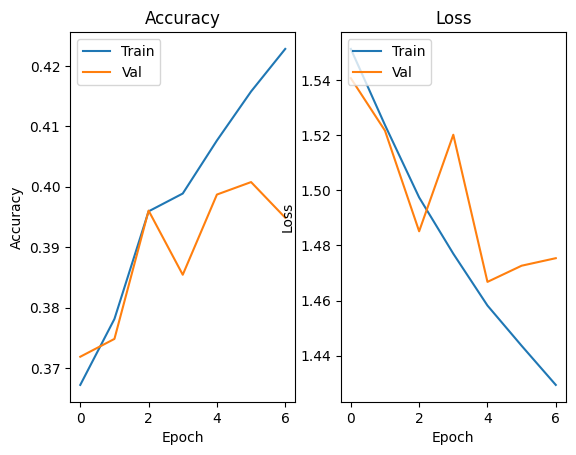

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.figure(figsize=(10,6))
#plt.tight_layout()

plt.show()

In [ ]:
model.save_weights("initial_weights.h5", save_format='h5')

In [ ]:
files.download("initial_weights.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Starting the next iteration of training #2.

In [ ]:
model_2 = load_model("/content/model1.tf")

filepath = "model2.tf"
checkpoint = ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min', save_format='tf')
callbacks_list = [checkpoint]
history = model_2.fit(X_trHE, Y_trHE, validation_data=(X_valHE, Y_valHE), batch_size=250, epochs=3, callbacks=callbacks_list)

Epoch 1/3
109/109 [==============================] - ETA: 0s - loss: 1.4162 - accuracy: 0.4286

109/109 [==============================] - 1134s 10s/step - loss: 1.4162 - accuracy: 0.4286 - val_loss: 1.4117 - val_accuracy: 0.4244
Epoch 2/3
109/109 [==============================] - ETA: 0s - loss: 1.3995 - accuracy: 0.4336

109/109 [==============================] - 1112s 10s/step - loss: 1.3995 - accuracy: 0.4336 - val_loss: 1.4157 - val_accuracy: 0.4244
Epoch 3/3
109/109 [==============================] - ETA: 0s - loss: 1.3942 - accuracy: 0.4357

109/109 [==============================] - 1165s 11s/step - loss: 1.3942 - accuracy: 0.4357 - val_loss: 1.3901 - val_accuracy: 0.4347


In [ ]:
!zip -r /content/model2.tf.zip /content/model2.tf

  adding: content/model2.tf/ (stored 0%)
  adding: content/model2.tf/keras_metadata.pb (deflated 94%)
  adding: content/model2.tf/fingerprint.pb (stored 0%)
  adding: content/model2.tf/assets/ (stored 0%)
  adding: content/model2.tf/saved_model.pb (deflated 91%)
  adding: content/model2.tf/variables/ (stored 0%)
  adding: content/model2.tf/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/model2.tf/variables/variables.index (deflated 68%)


Starting the next iteration of training #3

In [ ]:
model_3 = load_model("/content/model2.tf")

filepath = "model3.tf"
checkpoint = ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min', save_format='tf')
callbacks_list = [checkpoint]
history = model_3.fit(X_trHE, Y_trHE, validation_data=(X_valHE, Y_valHE), batch_size=250, epochs=7, callbacks=callbacks_list)

Epoch 1/7
109/109 [==============================] - ETA: 0s - loss: 1.3864 - accuracy: 0.4411

109/109 [==============================] - 1133s 10s/step - loss: 1.3864 - accuracy: 0.4411 - val_loss: 1.3723 - val_accuracy: 0.4347
Epoch 2/7
109/109 [==============================] - ETA: 0s - loss: 1.3705 - accuracy: 0.4467

109/109 [==============================] - 1098s 10s/step - loss: 1.3705 - accuracy: 0.4467 - val_loss: 1.4603 - val_accuracy: 0.4022
Epoch 3/7
109/109 [==============================] - ETA: 0s - loss: 1.3672 - accuracy: 0.4456

109/109 [==============================] - 1102s 10s/step - loss: 1.3672 - accuracy: 0.4456 - val_loss: 1.3452 - val_accuracy: 0.4544
Epoch 4/7
109/109 [==============================] - ETA: 0s - loss: 1.3535 - accuracy: 0.4545

109/109 [==============================] - 1178s 11s/step - loss: 1.3535 - accuracy: 0.4545 - val_loss: 1.3535 - val_accuracy: 0.4468
Epoch 5/7
109/109 [==============================] - ETA: 0s - loss: 1.3448 - accuracy: 0.4575

109/109 [==============================] - 1101s 10s/step - loss: 1.3448 - accuracy: 0.4575 - val_loss: 1.3432 - val_accuracy: 0.4583
Epoch 6/7
109/109 [==============================] - ETA: 0s - loss: 1.3409 - accuracy: 0.4604

109/109 [==============================] - 1114s 10s/step - loss: 1.3409 - accuracy: 0.4604 - val_loss: 1.3429 - val_accuracy: 0.4600
Epoch 7/7
109/109 [==============================] - ETA: 0s - loss: 1.3306 - accuracy: 0.4655

109/109 [==============================] - 1104s 10s/step - loss: 1.3306 - accuracy: 0.4655 - val_loss: 1.3105 - val_accuracy: 0.4718


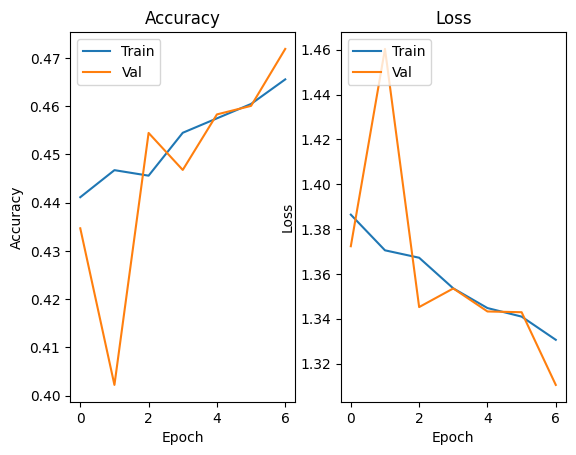

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.figure(figsize=(10,6))
#plt.tight_layout()

plt.show()

In [ ]:
!zip -r /content/model3.tf.zip /content/model3.tf

  adding: content/model3.tf/ (stored 0%)
  adding: content/model3.tf/keras_metadata.pb (deflated 94%)
  adding: content/model3.tf/fingerprint.pb (stored 0%)
  adding: content/model3.tf/assets/ (stored 0%)
  adding: content/model3.tf/saved_model.pb (deflated 91%)
  adding: content/model3.tf/variables/ (stored 0%)
  adding: content/model3.tf/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/model3.tf/variables/variables.index (deflated 68%)


In [ ]:
#Checking predict 

X_teHE = np.expand_dims(X_teNN_transformed, axis=2)
Predicted_outcomes = model.predict(X_teHE)

y_pred = encoder.inverse_transform(Predicted_outcomes)

106/106 [==============================] - 65s 607ms/step


Starting the next iteration of training #4

In [ ]:
model_4 = load_model("/content/model3.tf")

filepath = "model4.tf"
checkpoint = ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min', save_format='tf')
callbacks_list = [checkpoint]
history = model_4.fit(X_trHE, Y_trHE, validation_data=(X_valHE, Y_valHE), batch_size=250, epochs=5, callbacks=callbacks_list)

Epoch 1/5
109/109 [==============================] - ETA: 0s - loss: 1.3269 - accuracy: 0.4632 

109/109 [==============================] - 1214s 11s/step - loss: 1.3269 - accuracy: 0.4632 - val_loss: 1.3543 - val_accuracy: 0.4482
Epoch 2/5
109/109 [==============================] - ETA: 0s - loss: 1.3191 - accuracy: 0.4689

109/109 [==============================] - 1120s 10s/step - loss: 1.3191 - accuracy: 0.4689 - val_loss: 1.3175 - val_accuracy: 0.4721
Epoch 3/5
109/109 [==============================] - ETA: 0s - loss: 1.3084 - accuracy: 0.4732

109/109 [==============================] - 1154s 11s/step - loss: 1.3084 - accuracy: 0.4732 - val_loss: 1.3138 - val_accuracy: 0.4671
Epoch 4/5
109/109 [==============================] - ETA: 0s - loss: 1.3048 - accuracy: 0.4746 

109/109 [==============================] - 1202s 11s/step - loss: 1.3048 - accuracy: 0.4746 - val_loss: 1.3018 - val_accuracy: 0.4739
Epoch 5/5
109/109 [==============================] - ETA: 0s - loss: 1.2954 - accuracy: 0.4781

109/109 [==============================] - 1174s 11s/step - loss: 1.2954 - accuracy: 0.4781 - val_loss: 1.2874 - val_accuracy: 0.4810


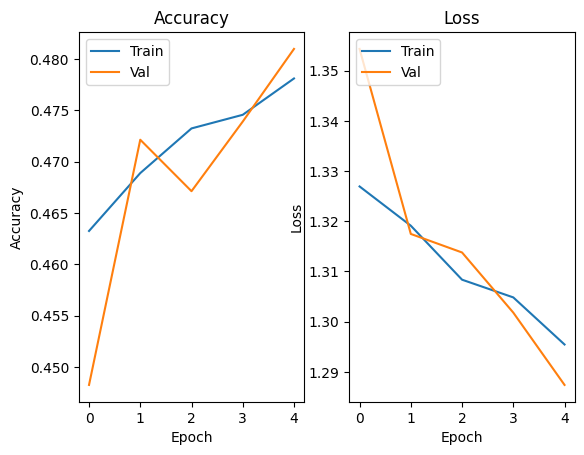

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.figure(figsize=(10,6))
#plt.tight_layout()

plt.show()

In [ ]:
!zip -r /content/model4.tf.zip /content/model4.tf

  adding: content/model4.tf/ (stored 0%)
  adding: content/model4.tf/keras_metadata.pb (deflated 94%)
  adding: content/model4.tf/fingerprint.pb (stored 0%)
  adding: content/model4.tf/assets/ (stored 0%)
  adding: content/model4.tf/saved_model.pb (deflated 91%)
  adding: content/model4.tf/variables/ (stored 0%)
  adding: content/model4.tf/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/model4.tf/variables/variables.index (deflated 68%)


Starting the next iteration of training #5



In [ ]:
model_5 = load_model("/content/model4.tf")

filepath = "model5.tf"
checkpoint = ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min', save_format='tf')
callbacks_list = [checkpoint]
history = model_5.fit(X_trHE, Y_trHE, validation_data=(X_valHE, Y_valHE), batch_size=250, epochs=2, callbacks=callbacks_list)

Epoch 1/2
109/109 [==============================] - ETA: 0s - loss: 1.2886 - accuracy: 0.4834

109/109 [==============================] - 1125s 10s/step - loss: 1.2886 - accuracy: 0.4834 - val_loss: 1.2749 - val_accuracy: 0.4860
Epoch 2/2
109/109 [==============================] - ETA: 0s - loss: 1.2856 - accuracy: 0.4825

109/109 [==============================] - 1156s 11s/step - loss: 1.2856 - accuracy: 0.4825 - val_loss: 1.3324 - val_accuracy: 0.4659


In [ ]:
!zip -r /content/model5.tf.zip /content/model5.tf

  adding: content/model5.tf/ (stored 0%)
  adding: content/model5.tf/keras_metadata.pb (deflated 94%)
  adding: content/model5.tf/fingerprint.pb (stored 0%)
  adding: content/model5.tf/assets/ (stored 0%)
  adding: content/model5.tf/saved_model.pb (deflated 91%)
  adding: content/model5.tf/variables/ (stored 0%)
  adding: content/model5.tf/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/model5.tf/variables/variables.index (deflated 68%)


Starting the next iteration of training #6



In [ ]:
!unzip /content/model5.tf.zip -d /content/model5.tf

Archive:  /content/model5.tf.zip
   creating: /content/model5.tf/content/model5.tf/
  inflating: /content/model5.tf/content/model5.tf/keras_metadata.pb  
 extracting: /content/model5.tf/content/model5.tf/fingerprint.pb  
   creating: /content/model5.tf/content/model5.tf/assets/
  inflating: /content/model5.tf/content/model5.tf/saved_model.pb  
   creating: /content/model5.tf/content/model5.tf/variables/
  inflating: /content/model5.tf/content/model5.tf/variables/variables.data-00000-of-00001  
  inflating: /content/model5.tf/content/model5.tf/variables/variables.index  


In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

model_6 = load_model("/content/model5.tf/content/model5.tf")

filepath = "model6.tf"
checkpoint = ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min', save_format='tf')
callbacks_list = [checkpoint]
history = model_6.fit(X_trHE, Y_trHE, validation_data=(X_valHE, Y_valHE), batch_size=250, epochs=30, callbacks=callbacks_list)

Epoch 1/30
109/109 [==============================] - ETA: 0s - loss: 1.2820 - accuracy: 0.4858

109/109 [==============================] - 315s 3s/step - loss: 1.2820 - accuracy: 0.4858 - val_loss: 1.2924 - val_accuracy: 0.4875
Epoch 2/30
109/109 [==============================] - ETA: 0s - loss: 1.2739 - accuracy: 0.4891

109/109 [==============================] - 300s 3s/step - loss: 1.2739 - accuracy: 0.4891 - val_loss: 1.2617 - val_accuracy: 0.4942
Epoch 3/30
109/109 [==============================] - ETA: 0s - loss: 1.2663 - accuracy: 0.4933

109/109 [==============================] - 298s 3s/step - loss: 1.2663 - accuracy: 0.4933 - val_loss: 1.3566 - val_accuracy: 0.4559
Epoch 4/30
109/109 [==============================] - ETA: 0s - loss: 1.2605 - accuracy: 0.4944

109/109 [==============================] - 302s 3s/step - loss: 1.2605 - accuracy: 0.4944 - val_loss: 1.2678 - val_accuracy: 0.4869
Epoch 5/30
109/109 [==============================] - ETA: 0s - loss: 1.2546 - accuracy: 0.4986

109/109 [==============================] - 296s 3s/step - loss: 1.2546 - accuracy: 0.4986 - val_loss: 1.2579 - val_accuracy: 0.4948
Epoch 6/30
109/109 [==============================] - ETA: 0s - loss: 1.2523 - accuracy: 0.4977

109/109 [==============================] - 297s 3s/step - loss: 1.2523 - accuracy: 0.4977 - val_loss: 1.2738 - val_accuracy: 0.4884
Epoch 7/30
109/109 [==============================] - ETA: 0s - loss: 1.2460 - accuracy: 0.5001

109/109 [==============================] - 298s 3s/step - loss: 1.2460 - accuracy: 0.5001 - val_loss: 1.2455 - val_accuracy: 0.4931
Epoch 8/30
109/109 [==============================] - ETA: 0s - loss: 1.2358 - accuracy: 0.5042

109/109 [==============================] - 300s 3s/step - loss: 1.2358 - accuracy: 0.5042 - val_loss: 1.2456 - val_accuracy: 0.4984
Epoch 9/30
109/109 [==============================] - ETA: 0s - loss: 1.2326 - accuracy: 0.5088

109/109 [==============================] - 296s 3s/step - loss: 1.2326 - accuracy: 0.5088 - val_loss: 1.2556 - val_accuracy: 0.4978
Epoch 10/30
109/109 [==============================] - ETA: 0s - loss: 1.2268 - accuracy: 0.5088

109/109 [==============================] - 305s 3s/step - loss: 1.2268 - accuracy: 0.5088 - val_loss: 1.2422 - val_accuracy: 0.4931
Epoch 11/30
109/109 [==============================] - ETA: 0s - loss: 1.2216 - accuracy: 0.5115

109/109 [==============================] - 299s 3s/step - loss: 1.2216 - accuracy: 0.5115 - val_loss: 1.2369 - val_accuracy: 0.4937
Epoch 12/30
109/109 [==============================] - ETA: 0s - loss: 1.2184 - accuracy: 0.5125

109/109 [==============================] - 303s 3s/step - loss: 1.2184 - accuracy: 0.5125 - val_loss: 1.2306 - val_accuracy: 0.4993
Epoch 13/30
109/109 [==============================] - ETA: 0s - loss: 1.2142 - accuracy: 0.5142

109/109 [==============================] - 306s 3s/step - loss: 1.2142 - accuracy: 0.5142 - val_loss: 1.2424 - val_accuracy: 0.4981
Epoch 14/30
109/109 [==============================] - ETA: 0s - loss: 1.2110 - accuracy: 0.5136

109/109 [==============================] - 298s 3s/step - loss: 1.2110 - accuracy: 0.5136 - val_loss: 1.2619 - val_accuracy: 0.4919
Epoch 15/30
109/109 [==============================] - ETA: 0s - loss: 1.2082 - accuracy: 0.5184

109/109 [==============================] - 299s 3s/step - loss: 1.2082 - accuracy: 0.5184 - val_loss: 1.2107 - val_accuracy: 0.5087
Epoch 16/30
109/109 [==============================] - ETA: 0s - loss: 1.2026 - accuracy: 0.5177

109/109 [==============================] - 303s 3s/step - loss: 1.2026 - accuracy: 0.5177 - val_loss: 1.2107 - val_accuracy: 0.5116
Epoch 17/30
109/109 [==============================] - ETA: 0s - loss: 1.1985 - accuracy: 0.5212

109/109 [==============================] - 302s 3s/step - loss: 1.1985 - accuracy: 0.5212 - val_loss: 1.2299 - val_accuracy: 0.4990
Epoch 18/30
109/109 [==============================] - ETA: 0s - loss: 1.1923 - accuracy: 0.5216

109/109 [==============================] - 303s 3s/step - loss: 1.1923 - accuracy: 0.5216 - val_loss: 1.2076 - val_accuracy: 0.5099
Epoch 19/30
109/109 [==============================] - ETA: 0s - loss: 1.1868 - accuracy: 0.5226

109/109 [==============================] - 301s 3s/step - loss: 1.1868 - accuracy: 0.5226 - val_loss: 1.1972 - val_accuracy: 0.5170
Epoch 20/30
109/109 [==============================] - ETA: 0s - loss: 1.1785 - accuracy: 0.5286

109/109 [==============================] - 305s 3s/step - loss: 1.1785 - accuracy: 0.5286 - val_loss: 1.2078 - val_accuracy: 0.5096
Epoch 21/30
109/109 [==============================] - ETA: 0s - loss: 1.1773 - accuracy: 0.5281

109/109 [==============================] - 302s 3s/step - loss: 1.1773 - accuracy: 0.5281 - val_loss: 1.1930 - val_accuracy: 0.5234
Epoch 22/30
109/109 [==============================] - 283s 3s/step - loss: 1.1777 - accuracy: 0.5305 - val_loss: 1.2042 - val_accuracy: 0.5081
Epoch 23/30
109/109 [==============================] - ETA: 0s - loss: 1.1728 - accuracy: 0.5296

109/109 [==============================] - 304s 3s/step - loss: 1.1728 - accuracy: 0.5296 - val_loss: 1.2159 - val_accuracy: 0.5069
Epoch 24/30
109/109 [==============================] - ETA: 0s - loss: 1.1667 - accuracy: 0.5336

109/109 [==============================] - 305s 3s/step - loss: 1.1667 - accuracy: 0.5336 - val_loss: 1.1836 - val_accuracy: 0.5223
Epoch 25/30
109/109 [==============================] - ETA: 0s - loss: 1.1632 - accuracy: 0.5339

109/109 [==============================] - 302s 3s/step - loss: 1.1632 - accuracy: 0.5339 - val_loss: 1.1785 - val_accuracy: 0.5229
Epoch 26/30
109/109 [==============================] - ETA: 0s - loss: 1.1604 - accuracy: 0.5354

109/109 [==============================] - 299s 3s/step - loss: 1.1604 - accuracy: 0.5354 - val_loss: 1.1918 - val_accuracy: 0.5158
Epoch 27/30
109/109 [==============================] - ETA: 0s - loss: 1.1563 - accuracy: 0.5388

109/109 [==============================] - 300s 3s/step - loss: 1.1563 - accuracy: 0.5388 - val_loss: 1.1685 - val_accuracy: 0.5243
Epoch 28/30
109/109 [==============================] - ETA: 0s - loss: 1.1510 - accuracy: 0.5403

109/109 [==============================] - 304s 3s/step - loss: 1.1510 - accuracy: 0.5403 - val_loss: 1.1778 - val_accuracy: 0.5288
Epoch 29/30
109/109 [==============================] - ETA: 0s - loss: 1.1485 - accuracy: 0.5417

109/109 [==============================] - 299s 3s/step - loss: 1.1485 - accuracy: 0.5417 - val_loss: 1.2149 - val_accuracy: 0.5052
Epoch 30/30
109/109 [==============================] - ETA: 0s - loss: 1.1447 - accuracy: 0.5458

109/109 [==============================] - 302s 3s/step - loss: 1.1447 - accuracy: 0.5458 - val_loss: 1.1711 - val_accuracy: 0.5252


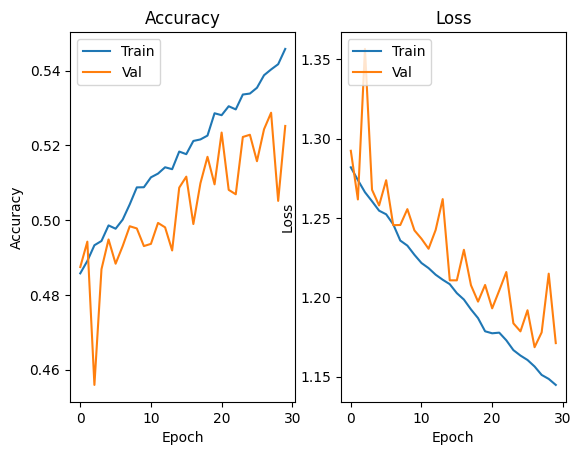

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.figure(figsize=(10,6))
#plt.tight_layout()

plt.show()

In [ ]:
!zip -r /content/model6.tf.zip /content/model6.tf

  adding: content/model6.tf/ (stored 0%)
  adding: content/model6.tf/assets/ (stored 0%)
  adding: content/model6.tf/saved_model.pb (deflated 91%)
  adding: content/model6.tf/fingerprint.pb (stored 0%)
  adding: content/model6.tf/keras_metadata.pb (deflated 94%)
  adding: content/model6.tf/variables/ (stored 0%)
  adding: content/model6.tf/variables/variables.index (deflated 68%)
  adding: content/model6.tf/variables/variables.data-00000-of-00001 (deflated 6%)


In [ ]:
#Checking predict 

X_teHE = np.expand_dims(X_teNN_transformed, axis=2)
Predicted_outcomes = model.predict(X_teHE)

y_pred = enc.inverse_transform(Predicted_outcomes)

106/106 [==============================] - 23s 213ms/step


In [ ]:
np.unique(y_pred)

array(['Disgust'], dtype=object)

array(['Disgust'], dtype=object)

Starting the next iteration of training #7



In [ ]:
model_7 = load_model("/content/model6.tf")

filepath = "model7.tf"
checkpoint = ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min', save_format='tf')
callbacks_list = [checkpoint]
history = model_7.fit(X_trHE, Y_trHE, validation_data=(X_valHE, Y_valHE), batch_size=250, epochs=12, callbacks=callbacks_list)

Epoch 1/12
109/109 [==============================] - ETA: 0s - loss: 1.1447 - accuracy: 0.5429

109/109 [==============================] - 337s 3s/step - loss: 1.1447 - accuracy: 0.5429 - val_loss: 1.1705 - val_accuracy: 0.5314
Epoch 2/12
109/109 [==============================] - ETA: 0s - loss: 1.1367 - accuracy: 0.5460

109/109 [==============================] - 308s 3s/step - loss: 1.1367 - accuracy: 0.5460 - val_loss: 1.1619 - val_accuracy: 0.5264
Epoch 3/12
109/109 [==============================] - ETA: 0s - loss: 1.1332 - accuracy: 0.5474

109/109 [==============================] - 301s 3s/step - loss: 1.1332 - accuracy: 0.5474 - val_loss: 1.1802 - val_accuracy: 0.5170
Epoch 4/12
109/109 [==============================] - 282s 3s/step - loss: 1.1339 - accuracy: 0.5473 - val_loss: 1.1518 - val_accuracy: 0.5338
Epoch 5/12
109/109 [==============================] - ETA: 0s - loss: 1.1300 - accuracy: 0.5482

109/109 [==============================] - 302s 3s/step - loss: 1.1300 - accuracy: 0.5482 - val_loss: 1.1514 - val_accuracy: 0.5347
Epoch 6/12
109/109 [==============================] - ETA: 0s - loss: 1.1264 - accuracy: 0.5491

109/109 [==============================] - 304s 3s/step - loss: 1.1264 - accuracy: 0.5491 - val_loss: 1.1779 - val_accuracy: 0.5320
Epoch 7/12
109/109 [==============================] - ETA: 0s - loss: 1.1228 - accuracy: 0.5532

109/109 [==============================] - 303s 3s/step - loss: 1.1228 - accuracy: 0.5532 - val_loss: 1.2508 - val_accuracy: 0.4942
Epoch 8/12
109/109 [==============================] - ETA: 0s - loss: 1.1227 - accuracy: 0.5521

109/109 [==============================] - 305s 3s/step - loss: 1.1227 - accuracy: 0.5521 - val_loss: 1.1559 - val_accuracy: 0.5326
Epoch 9/12
109/109 [==============================] - ETA: 0s - loss: 1.1155 - accuracy: 0.5560

109/109 [==============================] - 304s 3s/step - loss: 1.1155 - accuracy: 0.5560 - val_loss: 1.1824 - val_accuracy: 0.5231
Epoch 10/12
109/109 [==============================] - ETA: 0s - loss: 1.1118 - accuracy: 0.5558

109/109 [==============================] - 302s 3s/step - loss: 1.1118 - accuracy: 0.5558 - val_loss: 1.1602 - val_accuracy: 0.5276
Epoch 11/12
109/109 [==============================] - ETA: 0s - loss: 1.1101 - accuracy: 0.5609

109/109 [==============================] - 303s 3s/step - loss: 1.1101 - accuracy: 0.5609 - val_loss: 1.1860 - val_accuracy: 0.5261
Epoch 12/12
109/109 [==============================] - ETA: 0s - loss: 1.1065 - accuracy: 0.5609

109/109 [==============================] - 301s 3s/step - loss: 1.1065 - accuracy: 0.5609 - val_loss: 1.1457 - val_accuracy: 0.5403


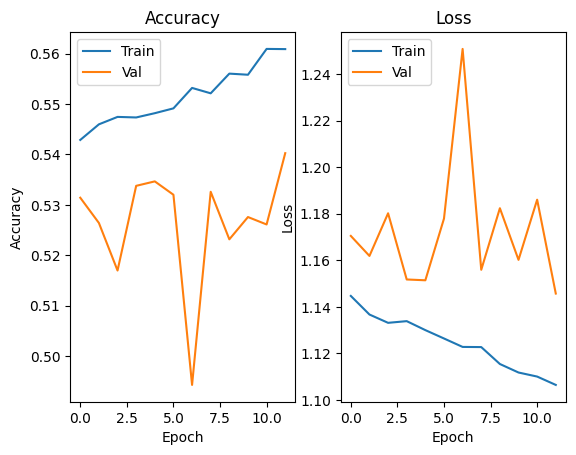

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.figure(figsize=(10,6))
#plt.tight_layout()

plt.show()

In [ ]:
!zip -r /content/model7.tf.zip /content/model7.tf

updating: content/model7.tf/ (stored 0%)
updating: content/model7.tf/assets/ (stored 0%)
updating: content/model7.tf/saved_model.pb (deflated 91%)
updating: content/model7.tf/fingerprint.pb (stored 0%)
updating: content/model7.tf/keras_metadata.pb (deflated 94%)
updating: content/model7.tf/variables/ (stored 0%)
updating: content/model7.tf/variables/variables.index (deflated 68%)
updating: content/model7.tf/variables/variables.data-00000-of-00001 (deflated 6%)


In [ ]:
X_teHE = np.expand_dims(X_teNN_transformed, axis=2)
Predicted_outcomes = model.predict(X_teHE)

y_pred = enc.inverse_transform(Predicted_outcomes)

np.unique(y_pred)

106/106 [==============================] - 22s 199ms/step


array(['Disgust'], dtype=object)

Starting the next iteration of training #8



In [ ]:
!unzip /content/model7.tf.zip -d /content/model7.tf

Archive:  /content/model7.tf.zip
   creating: /content/model7.tf/content/model7.tf/
   creating: /content/model7.tf/content/model7.tf/assets/
  inflating: /content/model7.tf/content/model7.tf/saved_model.pb  
 extracting: /content/model7.tf/content/model7.tf/fingerprint.pb  
  inflating: /content/model7.tf/content/model7.tf/keras_metadata.pb  
   creating: /content/model7.tf/content/model7.tf/variables/
  inflating: /content/model7.tf/content/model7.tf/variables/variables.index  
  inflating: /content/model7.tf/content/model7.tf/variables/variables.data-00000-of-00001  


In [ ]:
np.unique(Y_trNN)

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise',
       'Surprising'], dtype=object)

In [ ]:
model_8 = load_model("/content/model7.tf/content/model7.tf")

filepath = "model8.tf"
checkpoint = ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min', save_format='tf')
callbacks_list = [checkpoint]
history = model_8.fit(X_trHE, Y_trHE, validation_data=(X_valHE, Y_valHE), batch_size=250, epochs=17, callbacks=callbacks_list)

Epoch 1/17
109/109 [==============================] - ETA: 0s - loss: 1.1048 - accuracy: 0.5597

109/109 [==============================] - 311s 3s/step - loss: 1.1048 - accuracy: 0.5597 - val_loss: 1.1330 - val_accuracy: 0.5429
Epoch 2/17
109/109 [==============================] - ETA: 0s - loss: 1.0968 - accuracy: 0.5630

109/109 [==============================] - 288s 3s/step - loss: 1.0968 - accuracy: 0.5630 - val_loss: 1.1649 - val_accuracy: 0.5308
Epoch 3/17
109/109 [==============================] - 266s 2s/step - loss: 1.1025 - accuracy: 0.5609 - val_loss: 1.1429 - val_accuracy: 0.5338
Epoch 4/17
109/109 [==============================] - ETA: 0s - loss: 1.0916 - accuracy: 0.5641

109/109 [==============================] - 286s 3s/step - loss: 1.0916 - accuracy: 0.5641 - val_loss: 1.1376 - val_accuracy: 0.5426
Epoch 5/17
109/109 [==============================] - 265s 2s/step - loss: 1.0975 - accuracy: 0.5609 - val_loss: 1.1374 - val_accuracy: 0.5459
Epoch 6/17
109/109 [==============================] - ETA: 0s - loss: 1.0893 - accuracy: 0.5644

109/109 [==============================] - 288s 3s/step - loss: 1.0893 - accuracy: 0.5644 - val_loss: 1.1348 - val_accuracy: 0.5358
Epoch 7/17
109/109 [==============================] - 267s 2s/step - loss: 1.0905 - accuracy: 0.5652 - val_loss: 1.1531 - val_accuracy: 0.5329
Epoch 8/17
109/109 [==============================] - ETA: 0s - loss: 1.0861 - accuracy: 0.5645

109/109 [==============================] - 286s 3s/step - loss: 1.0861 - accuracy: 0.5645 - val_loss: 1.1272 - val_accuracy: 0.5417
Epoch 9/17
109/109 [==============================] - ETA: 0s - loss: 1.0792 - accuracy: 0.5713

109/109 [==============================] - 286s 3s/step - loss: 1.0792 - accuracy: 0.5713 - val_loss: 1.1249 - val_accuracy: 0.5470
Epoch 10/17
109/109 [==============================] - 265s 2s/step - loss: 1.0793 - accuracy: 0.5710 - val_loss: 1.1355 - val_accuracy: 0.5405
Epoch 11/17
109/109 [==============================] - ETA: 0s - loss: 1.0748 - accuracy: 0.5727

109/109 [==============================] - 285s 3s/step - loss: 1.0748 - accuracy: 0.5727 - val_loss: 1.1222 - val_accuracy: 0.5509
Epoch 12/17
109/109 [==============================] - ETA: 0s - loss: 1.0733 - accuracy: 0.5694

109/109 [==============================] - 283s 3s/step - loss: 1.0733 - accuracy: 0.5694 - val_loss: 1.1419 - val_accuracy: 0.5438
Epoch 13/17
109/109 [==============================] - ETA: 0s - loss: 1.0707 - accuracy: 0.5727

109/109 [==============================] - 285s 3s/step - loss: 1.0707 - accuracy: 0.5727 - val_loss: 1.1328 - val_accuracy: 0.5473
Epoch 14/17
109/109 [==============================] - ETA: 0s - loss: 1.0644 - accuracy: 0.5765

109/109 [==============================] - 286s 3s/step - loss: 1.0644 - accuracy: 0.5765 - val_loss: 1.1331 - val_accuracy: 0.5485
Epoch 15/17
109/109 [==============================] - ETA: 0s - loss: 1.0632 - accuracy: 0.5758

109/109 [==============================] - 283s 3s/step - loss: 1.0632 - accuracy: 0.5758 - val_loss: 1.1197 - val_accuracy: 0.5464
Epoch 16/17
109/109 [==============================] - 266s 2s/step - loss: 1.0639 - accuracy: 0.5751 - val_loss: 1.1271 - val_accuracy: 0.5438
Epoch 17/17
109/109 [==============================] - ETA: 0s - loss: 1.0622 - accuracy: 0.5761

109/109 [==============================] - 284s 3s/step - loss: 1.0622 - accuracy: 0.5761 - val_loss: 1.1503 - val_accuracy: 0.5276


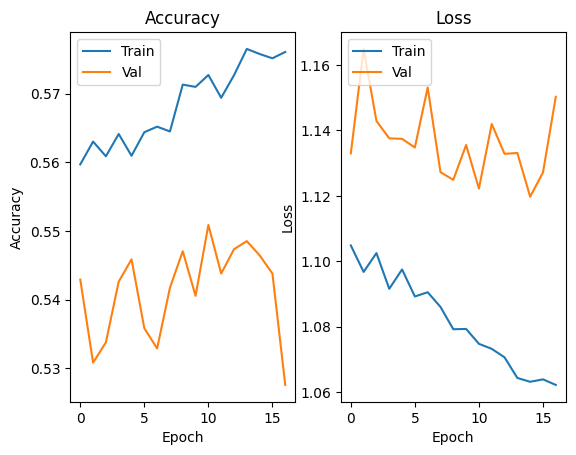

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.figure(figsize=(10,6))
#plt.tight_layout()

plt.show()

In [ ]:
!zip -r /content/model8.tf.zip /content/model8.tf

  adding: content/model8.tf/ (stored 0%)
  adding: content/model8.tf/keras_metadata.pb (deflated 94%)
  adding: content/model8.tf/fingerprint.pb (stored 0%)
  adding: content/model8.tf/assets/ (stored 0%)
  adding: content/model8.tf/saved_model.pb (deflated 91%)
  adding: content/model8.tf/variables/ (stored 0%)
  adding: content/model8.tf/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/model8.tf/variables/variables.index (deflated 68%)


In [ ]:
files.download("model8.tf.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Starting the next iteration of training #8



In [ ]:
!unzip /content/model8.tf.zip -d /content/model8.tf

Archive:  /content/model8.tf.zip
   creating: /content/model8.tf/content/model8.tf/
  inflating: /content/model8.tf/content/model8.tf/keras_metadata.pb  
 extracting: /content/model8.tf/content/model8.tf/fingerprint.pb  
   creating: /content/model8.tf/content/model8.tf/assets/
  inflating: /content/model8.tf/content/model8.tf/saved_model.pb  
   creating: /content/model8.tf/content/model8.tf/variables/
  inflating: /content/model8.tf/content/model8.tf/variables/variables.data-00000-of-00001  
  inflating: /content/model8.tf/content/model8.tf/variables/variables.index  


In [ ]:
model_9 = load_model("/content/model8.tf/content/model8.tf")

filepath = "model9.tf"
checkpoint = ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min', save_format='tf')
callbacks_list = [checkpoint]
history = model_9.fit(X_trHE, Y_trHE, validation_data=(X_valHE, Y_valHE), batch_size=250, epochs=7, callbacks=callbacks_list)

Epoch 1/7
109/109 [==============================] - ETA: 0s - loss: 1.0591 - accuracy: 0.5784 

109/109 [==============================] - 1807s 16s/step - loss: 1.0591 - accuracy: 0.5784 - val_loss: 1.1328 - val_accuracy: 0.5435
Epoch 2/7
109/109 [==============================] - ETA: 0s - loss: 1.0523 - accuracy: 0.5821 

109/109 [==============================] - 1814s 17s/step - loss: 1.0523 - accuracy: 0.5821 - val_loss: 1.1253 - val_accuracy: 0.5512
Epoch 3/7
109/109 [==============================] - 1767s 16s/step - loss: 1.0543 - accuracy: 0.5814 - val_loss: 1.1095 - val_accuracy: 0.5606
Epoch 4/7
109/109 [==============================] - ETA: 0s - loss: 1.0505 - accuracy: 0.5846 

109/109 [==============================] - 1750s 16s/step - loss: 1.0505 - accuracy: 0.5846 - val_loss: 1.0961 - val_accuracy: 0.5559
Epoch 5/7
109/109 [==============================] - ETA: 0s - loss: 1.0483 - accuracy: 0.5839 

109/109 [==============================] - 1766s 16s/step - loss: 1.0483 - accuracy: 0.5839 - val_loss: 1.1157 - val_accuracy: 0.5482
Epoch 6/7
109/109 [==============================] - ETA: 0s - loss: 1.0413 - accuracy: 0.5855 

109/109 [==============================] - 1757s 16s/step - loss: 1.0413 - accuracy: 0.5855 - val_loss: 1.1203 - val_accuracy: 0.5497
Epoch 7/7
109/109 [==============================] - ETA: 0s - loss: 1.0409 - accuracy: 0.5848 

109/109 [==============================] - 1776s 16s/step - loss: 1.0409 - accuracy: 0.5848 - val_loss: 1.1055 - val_accuracy: 0.5556


In [ ]:
!zip -r /content/model9.tf.zip /content/model9.tf

  adding: content/model9.tf/ (stored 0%)
  adding: content/model9.tf/assets/ (stored 0%)
  adding: content/model9.tf/saved_model.pb (deflated 91%)
  adding: content/model9.tf/variables/ (stored 0%)
  adding: content/model9.tf/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/model9.tf/variables/variables.index (deflated 68%)
  adding: content/model9.tf/keras_metadata.pb (deflated 94%)
  adding: content/model9.tf/fingerprint.pb (stored 0%)


In [ ]:
X_teHE = np.expand_dims(X_teNN_transformed, axis=2)
Predicted_outcomes = model_9.predict(X_teHE)

y_pred = enc.inverse_transform(Predicted_outcomes)

np.unique(y_pred)

106/106 [==============================] - 115s 1s/step


array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise',
       'Surprising'], dtype=object)

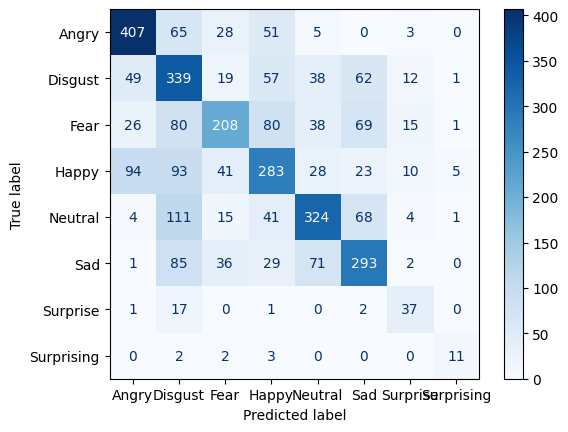

In [ ]:
cm = confusion_matrix(Y_teNN, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = np.unique(Y_teNN))
disp.plot(cmap=plt.cm.Blues)
plt.show()

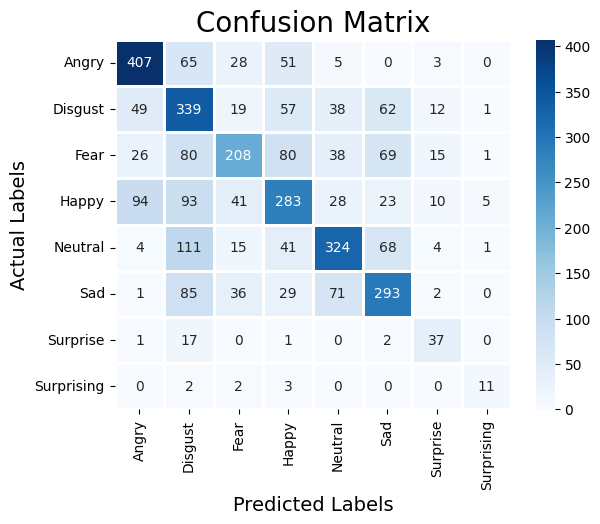

In [ ]:
cm = confusion_matrix(Y_teNN, y_pred)
cm = pd.DataFrame(cm , index = [i for i in enc.categories_] , columns = [i for i in enc.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
model_9.save_weights("presentation_weights.h5", save_format='h5')

In [ ]:
files.download("presentation_weights.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Starting the next iteration of training #10



In [ ]:
!unzip /content/model9.tf.zip -d /content/model9.tf

Archive:  /content/model9.tf.zip
   creating: /content/model9.tf/content/model9.tf/
   creating: /content/model9.tf/content/model9.tf/assets/
  inflating: /content/model9.tf/content/model9.tf/saved_model.pb  
   creating: /content/model9.tf/content/model9.tf/variables/
  inflating: /content/model9.tf/content/model9.tf/variables/variables.data-00000-of-00001  
  inflating: /content/model9.tf/content/model9.tf/variables/variables.index  
  inflating: /content/model9.tf/content/model9.tf/keras_metadata.pb  
 extracting: /content/model9.tf/content/model9.tf/fingerprint.pb  


In [ ]:
model_10 = load_model("/content/model9.tf/content/model9.tf")

filepath = "model10.tf"
checkpoint = ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min', save_format='tf')
callbacks_list = [checkpoint]
history = model_10.fit(X_trHE, Y_trHE, validation_data=(X_valHE, Y_valHE), batch_size=250, epochs=22, callbacks=callbacks_list)

Epoch 1/22
109/109 [==============================] - ETA: 0s - loss: 1.0362 - accuracy: 0.5869

109/109 [==============================] - 319s 3s/step - loss: 1.0362 - accuracy: 0.5869 - val_loss: 1.1100 - val_accuracy: 0.5585
Epoch 2/22
109/109 [==============================] - ETA: 0s - loss: 1.0295 - accuracy: 0.5917

109/109 [==============================] - 302s 3s/step - loss: 1.0295 - accuracy: 0.5917 - val_loss: 1.1349 - val_accuracy: 0.5391
Epoch 3/22
109/109 [==============================] - 279s 3s/step - loss: 1.0346 - accuracy: 0.5925 - val_loss: 1.1570 - val_accuracy: 0.5358
Epoch 4/22
109/109 [==============================] - 279s 3s/step - loss: 1.0336 - accuracy: 0.5869 - val_loss: 1.0982 - val_accuracy: 0.5565
Epoch 5/22
109/109 [==============================] - ETA: 0s - loss: 1.0240 - accuracy: 0.5947

109/109 [==============================] - 299s 3s/step - loss: 1.0240 - accuracy: 0.5947 - val_loss: 1.1031 - val_accuracy: 0.5591
Epoch 6/22
109/109 [==============================] - ETA: 0s - loss: 1.0198 - accuracy: 0.5946

109/109 [==============================] - 299s 3s/step - loss: 1.0198 - accuracy: 0.5946 - val_loss: 1.1001 - val_accuracy: 0.5641
Epoch 7/22
109/109 [==============================] - 276s 3s/step - loss: 1.0202 - accuracy: 0.5925 - val_loss: 1.1189 - val_accuracy: 0.5538
Epoch 8/22
109/109 [==============================] - ETA: 0s - loss: 1.0158 - accuracy: 0.5964

109/109 [==============================] - 299s 3s/step - loss: 1.0158 - accuracy: 0.5964 - val_loss: 1.0937 - val_accuracy: 0.5627
Epoch 9/22
109/109 [==============================] - 276s 3s/step - loss: 1.0176 - accuracy: 0.5953 - val_loss: 1.1000 - val_accuracy: 0.5609
Epoch 10/22
109/109 [==============================] - ETA: 0s - loss: 1.0095 - accuracy: 0.5977

109/109 [==============================] - 296s 3s/step - loss: 1.0095 - accuracy: 0.5977 - val_loss: 1.0993 - val_accuracy: 0.5680
Epoch 11/22
109/109 [==============================] - ETA: 0s - loss: 1.0089 - accuracy: 0.6001

109/109 [==============================] - 296s 3s/step - loss: 1.0089 - accuracy: 0.6001 - val_loss: 1.1083 - val_accuracy: 0.5547
Epoch 12/22
109/109 [==============================] - ETA: 0s - loss: 1.0048 - accuracy: 0.5993

109/109 [==============================] - 297s 3s/step - loss: 1.0048 - accuracy: 0.5993 - val_loss: 1.0919 - val_accuracy: 0.5671
Epoch 13/22
109/109 [==============================] - 276s 3s/step - loss: 1.0066 - accuracy: 0.5997 - val_loss: 1.1001 - val_accuracy: 0.5650
Epoch 14/22
109/109 [==============================] - ETA: 0s - loss: 1.0039 - accuracy: 0.5999

109/109 [==============================] - 297s 3s/step - loss: 1.0039 - accuracy: 0.5999 - val_loss: 1.1182 - val_accuracy: 0.5470
Epoch 15/22
109/109 [==============================] - ETA: 0s - loss: 1.0020 - accuracy: 0.6037

109/109 [==============================] - 298s 3s/step - loss: 1.0020 - accuracy: 0.6037 - val_loss: 1.1177 - val_accuracy: 0.5547
Epoch 16/22
109/109 [==============================] - ETA: 0s - loss: 0.9968 - accuracy: 0.6043

109/109 [==============================] - 297s 3s/step - loss: 0.9968 - accuracy: 0.6043 - val_loss: 1.1039 - val_accuracy: 0.5609
Epoch 17/22
109/109 [==============================] - ETA: 0s - loss: 0.9956 - accuracy: 0.6057

109/109 [==============================] - 296s 3s/step - loss: 0.9956 - accuracy: 0.6057 - val_loss: 1.0793 - val_accuracy: 0.5692
Epoch 18/22
109/109 [==============================] - ETA: 0s - loss: 0.9895 - accuracy: 0.6077

109/109 [==============================] - 295s 3s/step - loss: 0.9895 - accuracy: 0.6077 - val_loss: 1.0981 - val_accuracy: 0.5627
Epoch 19/22
109/109 [==============================] - ETA: 0s - loss: 0.9880 - accuracy: 0.6050

109/109 [==============================] - 296s 3s/step - loss: 0.9880 - accuracy: 0.6050 - val_loss: 1.0778 - val_accuracy: 0.5674
Epoch 20/22
109/109 [==============================] - ETA: 0s - loss: 0.9864 - accuracy: 0.6106

109/109 [==============================] - 297s 3s/step - loss: 0.9864 - accuracy: 0.6106 - val_loss: 1.1282 - val_accuracy: 0.5568
Epoch 21/22
109/109 [==============================] - ETA: 0s - loss: 0.9840 - accuracy: 0.6099

109/109 [==============================] - 296s 3s/step - loss: 0.9840 - accuracy: 0.6099 - val_loss: 1.0777 - val_accuracy: 0.5686
Epoch 22/22
109/109 [==============================] - ETA: 0s - loss: 0.9829 - accuracy: 0.6112

109/109 [==============================] - 300s 3s/step - loss: 0.9829 - accuracy: 0.6112 - val_loss: 1.0860 - val_accuracy: 0.5706


In [ ]:
!zip -r /content/model10.tf.zip /content/model10.tf

  adding: content/model10.tf/ (stored 0%)
  adding: content/model10.tf/assets/ (stored 0%)
  adding: content/model10.tf/fingerprint.pb (stored 0%)
  adding: content/model10.tf/saved_model.pb (deflated 91%)
  adding: content/model10.tf/variables/ (stored 0%)
  adding: content/model10.tf/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/model10.tf/variables/variables.index (deflated 68%)
  adding: content/model10.tf/keras_metadata.pb (deflated 94%)


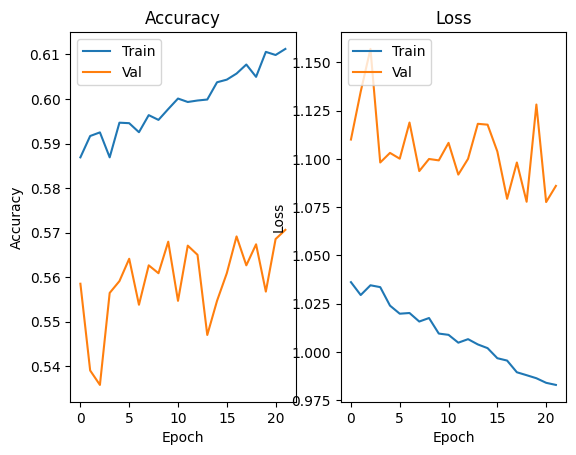

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.figure(figsize=(10,6))
#plt.tight_layout()

plt.show()

Starting the next iteration of training #11



In [ ]:
!unzip /content/model10.tf.zip -d /content/model10.tf

Archive:  /content/model10.tf.zip
   creating: /content/model10.tf/content/model10.tf/
   creating: /content/model10.tf/content/model10.tf/assets/
 extracting: /content/model10.tf/content/model10.tf/fingerprint.pb  
  inflating: /content/model10.tf/content/model10.tf/saved_model.pb  
   creating: /content/model10.tf/content/model10.tf/variables/
  inflating: /content/model10.tf/content/model10.tf/variables/variables.data-00000-of-00001  
  inflating: /content/model10.tf/content/model10.tf/variables/variables.index  
  inflating: /content/model10.tf/content/model10.tf/keras_metadata.pb  


In [ ]:
model_11 = load_model("/content/model10.tf/content/model10.tf")

filepath = "model11.tf"
checkpoint = ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min', save_format='tf')
callbacks_list = [checkpoint]
history = model_11.fit(X_trHE, Y_trHE, validation_data=(X_valHE, Y_valHE), batch_size=250, epochs=12, callbacks=callbacks_list)

Epoch 1/12
109/109 [==============================] - ETA: 0s - loss: 0.9758 - accuracy: 0.6129

109/109 [==============================] - 309s 3s/step - loss: 0.9758 - accuracy: 0.6129 - val_loss: 1.0756 - val_accuracy: 0.5748
Epoch 2/12
109/109 [==============================] - ETA: 0s - loss: 0.9745 - accuracy: 0.6124

109/109 [==============================] - 319s 3s/step - loss: 0.9745 - accuracy: 0.6124 - val_loss: 1.0924 - val_accuracy: 0.5680
Epoch 3/12
109/109 [==============================] - ETA: 0s - loss: 0.9744 - accuracy: 0.6147

109/109 [==============================] - 290s 3s/step - loss: 0.9744 - accuracy: 0.6147 - val_loss: 1.0981 - val_accuracy: 0.5638
Epoch 4/12
109/109 [==============================] - ETA: 0s - loss: 0.9724 - accuracy: 0.6154

109/109 [==============================] - 289s 3s/step - loss: 0.9724 - accuracy: 0.6154 - val_loss: 1.0727 - val_accuracy: 0.5727
Epoch 5/12
109/109 [==============================] - ETA: 0s - loss: 0.9674 - accuracy: 0.6176

109/109 [==============================] - 287s 3s/step - loss: 0.9674 - accuracy: 0.6176 - val_loss: 1.0784 - val_accuracy: 0.5697
Epoch 6/12
109/109 [==============================] - ETA: 0s - loss: 0.9662 - accuracy: 0.6181

109/109 [==============================] - 289s 3s/step - loss: 0.9662 - accuracy: 0.6181 - val_loss: 1.0820 - val_accuracy: 0.5706
Epoch 7/12
109/109 [==============================] - ETA: 0s - loss: 0.9647 - accuracy: 0.6170

109/109 [==============================] - 289s 3s/step - loss: 0.9647 - accuracy: 0.6170 - val_loss: 1.0995 - val_accuracy: 0.5641
Epoch 8/12
109/109 [==============================] - ETA: 0s - loss: 0.9583 - accuracy: 0.6209

109/109 [==============================] - 287s 3s/step - loss: 0.9583 - accuracy: 0.6209 - val_loss: 1.0671 - val_accuracy: 0.5715
Epoch 9/12
109/109 [==============================] - ETA: 0s - loss: 0.9551 - accuracy: 0.6243

109/109 [==============================] - 288s 3s/step - loss: 0.9551 - accuracy: 0.6243 - val_loss: 1.0797 - val_accuracy: 0.5727
Epoch 10/12
109/109 [==============================] - ETA: 0s - loss: 0.9497 - accuracy: 0.6234

109/109 [==============================] - 287s 3s/step - loss: 0.9497 - accuracy: 0.6234 - val_loss: 1.0782 - val_accuracy: 0.5709
Epoch 11/12
109/109 [==============================] - 269s 2s/step - loss: 0.9508 - accuracy: 0.6245 - val_loss: 1.0894 - val_accuracy: 0.5677
Epoch 12/12
109/109 [==============================] - ETA: 0s - loss: 0.9453 - accuracy: 0.6260

109/109 [==============================] - 293s 3s/step - loss: 0.9453 - accuracy: 0.6260 - val_loss: 1.0994 - val_accuracy: 0.5562


In [ ]:
!zip -r /content/model11.tf.zip /content/model11.tf

  adding: content/model11.tf/ (stored 0%)
  adding: content/model11.tf/keras_metadata.pb (deflated 94%)
  adding: content/model11.tf/fingerprint.pb (stored 0%)
  adding: content/model11.tf/saved_model.pb (deflated 91%)
  adding: content/model11.tf/assets/ (stored 0%)
  adding: content/model11.tf/variables/ (stored 0%)
  adding: content/model11.tf/variables/variables.index (deflated 68%)
  adding: content/model11.tf/variables/variables.data-00000-of-00001 (deflated 6%)


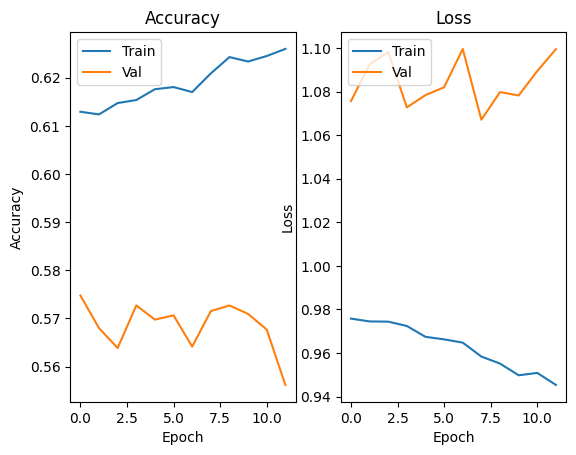

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.figure(figsize=(10,6))
#plt.tight_layout()

plt.show()

Starting the next iteration of training #12



In [ ]:
model_12 = load_model("/content/model11.tf")

filepath = "model12.tf"
checkpoint = ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min', save_format='tf')
callbacks_list = [checkpoint]
history = model_12.fit(X_trHE, Y_trHE, validation_data=(X_valHE, Y_valHE), batch_size=250, epochs=9, callbacks=callbacks_list)

Epoch 1/9
109/109 [==============================] - ETA: 0s - loss: 0.9481 - accuracy: 0.6251

109/109 [==============================] - 314s 3s/step - loss: 0.9481 - accuracy: 0.6251 - val_loss: 1.1001 - val_accuracy: 0.5665
Epoch 2/9
109/109 [==============================] - ETA: 0s - loss: 0.9393 - accuracy: 0.6305

109/109 [==============================] - 289s 3s/step - loss: 0.9393 - accuracy: 0.6305 - val_loss: 1.1151 - val_accuracy: 0.5606
Epoch 3/9
109/109 [==============================] - 272s 2s/step - loss: 0.9406 - accuracy: 0.6298 - val_loss: 1.0663 - val_accuracy: 0.5845
Epoch 4/9
109/109 [==============================] - ETA: 0s - loss: 0.9381 - accuracy: 0.6279

109/109 [==============================] - 291s 3s/step - loss: 0.9381 - accuracy: 0.6279 - val_loss: 1.0672 - val_accuracy: 0.5798
Epoch 5/9
109/109 [==============================] - ETA: 0s - loss: 0.9372 - accuracy: 0.6293

109/109 [==============================] - 293s 3s/step - loss: 0.9372 - accuracy: 0.6293 - val_loss: 1.1001 - val_accuracy: 0.5633
Epoch 6/9
109/109 [==============================] - ETA: 0s - loss: 0.9333 - accuracy: 0.6311

109/109 [==============================] - 290s 3s/step - loss: 0.9333 - accuracy: 0.6311 - val_loss: 1.0741 - val_accuracy: 0.5739
Epoch 7/9
109/109 [==============================] - ETA: 0s - loss: 0.9308 - accuracy: 0.6321

109/109 [==============================] - 293s 3s/step - loss: 0.9308 - accuracy: 0.6321 - val_loss: 1.0836 - val_accuracy: 0.5753
Epoch 8/9
109/109 [==============================] - ETA: 0s - loss: 0.9230 - accuracy: 0.6357

109/109 [==============================] - 289s 3s/step - loss: 0.9230 - accuracy: 0.6357 - val_loss: 1.0669 - val_accuracy: 0.5827
Epoch 9/9
109/109 [==============================] - 271s 2s/step - loss: 0.9275 - accuracy: 0.6352 - val_loss: 1.1206 - val_accuracy: 0.5692


In [ ]:
!zip -r /content/model12.tf.zip /content/model12.tf

  adding: content/model12.tf/ (stored 0%)
  adding: content/model12.tf/keras_metadata.pb (deflated 94%)
  adding: content/model12.tf/fingerprint.pb (stored 0%)
  adding: content/model12.tf/saved_model.pb (deflated 91%)
  adding: content/model12.tf/assets/ (stored 0%)
  adding: content/model12.tf/variables/ (stored 0%)
  adding: content/model12.tf/variables/variables.index (deflated 68%)
  adding: content/model12.tf/variables/variables.data-00000-of-00001 (deflated 6%)


In [ ]:
model_12.save("model_12.tf", save_format='tf')

In [ ]:
!zip -r /content/model_12.tf.zip /content/model_12.tf

  adding: content/model_12.tf/ (stored 0%)
  adding: content/model_12.tf/keras_metadata.pb (deflated 94%)
  adding: content/model_12.tf/fingerprint.pb (stored 0%)
  adding: content/model_12.tf/saved_model.pb (deflated 90%)
  adding: content/model_12.tf/assets/ (stored 0%)
  adding: content/model_12.tf/variables/ (stored 0%)
  adding: content/model_12.tf/variables/variables.index (deflated 68%)
  adding: content/model_12.tf/variables/variables.data-00000-of-00001 (deflated 6%)


In [ ]:
X_teHE = np.expand_dims(X_teNN_transformed, axis=2)
Predicted_outcomes = model_12.predict(X_teHE)

y_pred = enc.inverse_transform(Predicted_outcomes)

np.unique(y_pred)

106/106 [==============================] - 19s 165ms/step


array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise',
       'Surprising'], dtype=object)

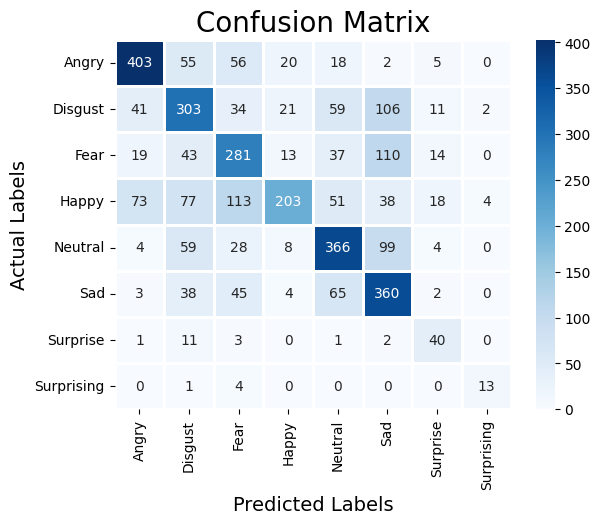

In [ ]:
cm = confusion_matrix(Y_teNN, y_pred)
cm = pd.DataFrame(cm , index = [i for i in enc.categories_] , columns = [i for i in enc.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Archive

DON'T RUN BELOW - IT'S THE HYPERPARAMETER TUNER AND TAKES OVER 12 HOURS.

In [ ]:
def build_model(hp):
    model = keras.Sequential()

    model.add(
        layers.Bidirectional(layers.LSTM(units = hp.Int('initial-l', min_value=50, max_value=250, step=10), 
                                         activation='sigmoid',return_sequences=True, 
                                        dropout = hp.Float('dropout_init', min_value=0.01, max_value=0.2, step=0.01),
                                        kernel_initializer=initializers.RandomNormal(stddev=0.2)), 
                             input_shape=(X_trNN_transformed.shape[1],1)))

    for i in range(hp.Int('num_layers', 1, 8)):
        model.add(layers.Bidirectional(layers.LSTM(units = hp.Int('layer'+str(i), min_value=50, max_value=250, step=10),
                                                   activation='sigmoid',return_sequences=True, 
                                                   dropout = hp.Float('dropout'+str(i), min_value=0.01, max_value=0.2, step=0.01),
                                                   kernel_initializer=initializers.RandomNormal(stddev=0.2))))

    model.add(layers.Bidirectional(layers.LSTM(units = hp.Int('final-l', min_value=50, max_value=250, step=10),
                                                   activation='sigmoid',
                                                   dropout = hp.Float('dropout'+str(i), min_value=0.01, max_value=0.2, step=0.01),
                                                   kernel_initializer=initializers.RandomNormal(stddev=0.2))))
    
    model.add(tf.keras.layers.Dense(5,activation="softmax"))

    optimizers_choices=hp.Choice('Optimizer', values=['Adam', 'SGD'])

    if optimizers_choices == 'Adam':
        hp_learning_rate = hp.Float('learning_rate', min_value=0.01, max_value=0.1, step=0.01)
    elif optimizers_choices == 'SGD':
        hp_learning_rate = hp.Float('learning_rate', min_value=0.01, max_value=0.1, step=0.01)
        #nesterov=True
        #momentum=0.9

    model.compile(loss='categorical_crossentropy', optimizer = optimizers_choices, metrics=['accuracy'])
    #Sparse Multiclass Cross-Entropy Loss
    return model

#Reference: 
#1) https://www.tensorflow.org/guide/keras/rnn#bidirectional_rnns
#2) https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
#3) https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional
#4) https://keras.io/keras_tuner/
#5) https://towardsdatascience.com/tune-deep-neural-networks-using-bayesian-optimization-c9f6503a049f

#With ReLu there was a vanishing gradient issue

In [ ]:
tuner_rnn = keras_tuner.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=10,
    project_name = 'FinalizedRNN1')

tuner_rnn.search(X_trHE, Y_trHE, validation_data=(X_valHE, Y_valHE),epochs=20, batch_size=200)
#Reference: https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/#:~:text=The%20number%20of%20epochs%20is%20the%20number%20of%20complete%20passes,value%20between%20one%20and%20infinity.